<a href="https://colab.research.google.com/github/Sushmitasuman21/Dog-vs-Cat-Classification/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
import numpy as np
import tensorflow as tf

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
from tensorflow.keras.models import Sequential

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [9]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [10]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:27<00:00, 44.0MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.0MB/s]


In [11]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [12]:
train_dir = '/content/train'
test_dir = '/content/test'

In [13]:
import tensorflow as tf
!pip install tensorflow
!pip install keras
from tensorflow import keras
!pip install sequential
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

  Preparing metadata (setup.py) ... done
  Created wheel for sequential: filename=sequential-1.0.0-py3-none-any.whl size=2856 sha256=b3395b9a222cac199d8d34405194a2a0237c991127015c8defa1937716a08e58
  Stored in directory: /root/.cache/pip/wheels/c3/61/56/fe456787532527aafb108ffeceecb4a2e928a518c88bbdd5c5
Successfully built sequential


In [14]:
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
batch_size = 32
epochs = 2

In [15]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.


In [17]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5000 images belonging to 2 classes.


In [18]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 1009s 2s/step - loss: 0.6570 - accuracy: 0.5867 - val_loss: 0.6073 - val_accuracy: 0.6733
Epoch 2/2
625/625 [==============================] - 973s 2s/step - loss: 0.5216 - accuracy: 0.7391 - val_loss: 0.4346 - val_accuracy: 0.7923


In [24]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 1009s 2s/step - loss: 0.1349 - accuracy: 0.9475 - val_loss: 0.3494 - val_accuracy: 0.8688
Epoch 2/2
625/625 [==============================] - 973s 2s/step - loss: 0.0970 - accuracy: 0.9610 - val_loss: 0.3798 - val_accuracy: 0.8796


In [22]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 955s 2s/step - loss: 0.2745 - accuracy: 0.8827 - val_loss: 0.2917 - val_accuracy: 0.8754
Epoch 2/2
625/625 [==============================] - 961s 2s/step - loss: 0.2164 - accuracy: 0.9109 - val_loss: 0.3056 - val_accuracy: 0.8746


In [26]:
history = model.fit(
    x=train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/2
625/625 [==============================] - 998s 2s/step - loss: 0.0440 - accuracy: 0.9841 - val_loss: 0.4754 - val_accuracy: 0.8892
Epoch 2/2
625/625 [==============================] - 974s 2s/step - loss: 0.0385 - accuracy: 0.9864 - val_loss: 0.5639 - val_accuracy: 0.8678


In [27]:
# Model evaluation
loss, accuracy = model.evaluate(test_generator)
print("test Loss:", loss)
print("test Accuracy:", accuracy)

157/157 [==============================] - 72s 457ms/step - loss: 0.5667 - accuracy: 0.8676
test Loss: 0.5667369365692139
test Accuracy: 0.8676000237464905


In [28]:
# Save the model
model.save('cat_dog_classifier_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


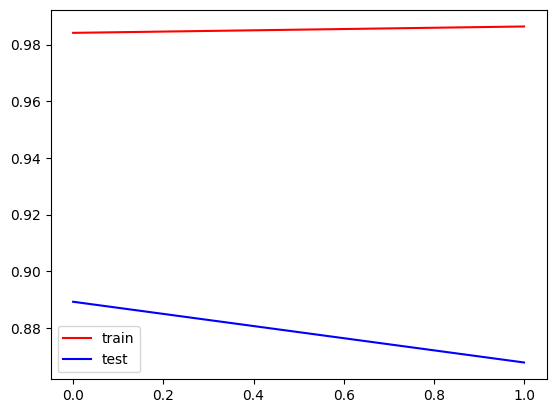

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

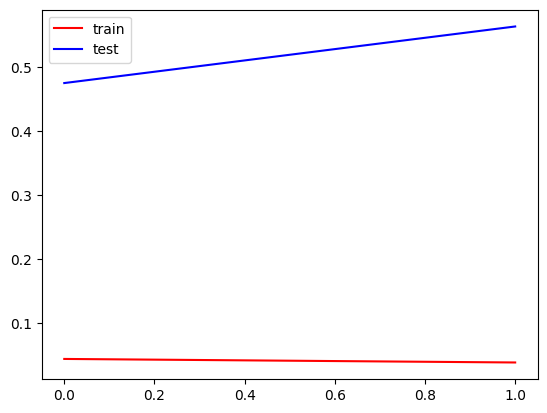

In [30]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [32]:
import cv2

In [42]:
test_img = cv2.imread('/content/cat.jpeg')

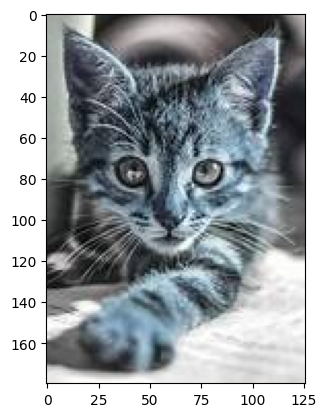

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(180, 126, 3)

In [45]:
test_img = cv2.resize(test_img, (150, 150))

In [46]:
test_img = test_img / 255.0

In [47]:
test_input = test_img.reshape((1, 150, 150, 3))

In [48]:
ans = model.predict(test_input)

1/1 [==============================] - 0s 29ms/step


In [50]:
if ans == 0:
  print("Model Predicted image as DOG")
else:
    print("Model Predicted image as CAT")

Model Predicted image as CAT
